In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nexar-collision-prediction/sample_submission.csv
/kaggle/input/nexar-collision-prediction/train.csv
/kaggle/input/nexar-collision-prediction/test.csv
/kaggle/input/nexar-collision-prediction/test/02772.mp4
/kaggle/input/nexar-collision-prediction/test/02807.mp4
/kaggle/input/nexar-collision-prediction/test/02509.mp4
/kaggle/input/nexar-collision-prediction/test/00350.mp4
/kaggle/input/nexar-collision-prediction/test/02163.mp4
/kaggle/input/nexar-collision-prediction/test/02707.mp4
/kaggle/input/nexar-collision-prediction/test/02741.mp4
/kaggle/input/nexar-collision-prediction/test/02727.mp4
/kaggle/input/nexar-collision-prediction/test/02773.mp4
/kaggle/input/nexar-collision-prediction/test/02068.mp4
/kaggle/input/nexar-collision-prediction/test/02254.mp4
/kaggle/input/nexar-collision-prediction/test/02813.mp4
/kaggle/input/nexar-collision-prediction/test/02486.mp4
/kaggle/input/nexar-collision-prediction/test/00490.mp4
/kaggle/input/nexar-collision-prediction/test/02265.

In [2]:
import cv2
from PIL import Image
from IPython.display import display
import matplotlib.pyplot as plt

In [3]:
train_df = pd.read_csv('/kaggle/input/nexar-collision-prediction/train.csv')
test_df = pd.read_csv('/kaggle/input/nexar-collision-prediction/test.csv')

print("Train shape:", train_df.shape)
train_df.head()

Train shape: (1500, 4)


/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,id,time_of_event,time_of_alert,target
0,1924,NaN,NaN,0
1,822,19.5,18.633,1
2,1429,NaN,NaN,0
3,208,19.8,19.233,1
4,1904,NaN,NaN,0


In [4]:
video_dir = "/kaggle/input/nexar-collision-prediction/train"
video_files = sorted([f for f in os.listdir(video_dir) if f.endswith('.mp4')])

print(f"Found {len(video_files)} video files.")
print("First 5 video filenames:", video_files[:5])


Found 1500 video files.
First 5 video filenames: ['00000.mp4', '00003.mp4', '00004.mp4', '00005.mp4', '00006.mp4']


In [5]:
def extract_video_frames(video_path, num_frames=16, size=(224, 224)):
    """Extract N evenly spaced frames from a video, with debug info."""
    cap = cv2.VideoCapture(video_path)

    if not cap.isOpened():
        print(f"❌ Failed to open video: {video_path}")
        return []

    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    print(f"Total frames in video: {total_frames}")

    if total_frames == 0:
        return []

    frame_indices = np.linspace(0, total_frames - 1, num_frames, dtype=int)
    frames = []

    for i in range(total_frames):
        ret, frame = cap.read()
        if not ret:
            print(f"⚠️ Frame {i} could not be read.")
            break
        if i in frame_indices:
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            frame = cv2.resize(frame, size)
            frames.append(frame)

    cap.release()
    return frames


Total frames in video: 1158
✅ Extracted 16 frames. Shape: (16, 224, 224, 3)


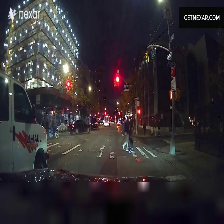

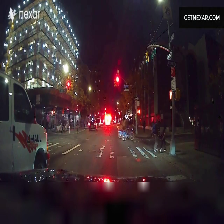

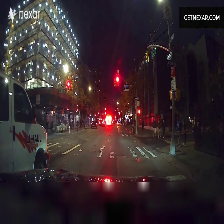

In [6]:
# Use first real video from the folder
sample_id = video_files[0].split(".")[0]
video_path = f"{video_dir}/{sample_id}.mp4"

frames = extract_video_frames(video_path)

if len(frames) > 0:
    frames = np.array(frames)
    print(f"✅ Extracted {len(frames)} frames. Shape: {frames.shape}")
    for f in frames[:3]:
        display(Image.fromarray(f))
else:
    print("❌ No frames extracted.")


In [7]:
# Parameters
MAX_VIDEOS = 1500        # Adjust if you want a larger subset
NUM_FRAMES = 16         # Number of frames per video
IMG_SIZE = (224, 224)   # Resize frames to this size

X = []
y = []

for fname in video_files[:MAX_VIDEOS]:
    video_id = int(fname.split(".")[0])
    video_path = f"{video_dir}/{fname}"
    
    # Get label from train.csv
    row = train_df[train_df["id"] == video_id]
    if row.empty:
        continue  # No label found
    
    label = row["target"].values[0]
    
    # Extract frames
    frames = extract_video_frames(video_path, num_frames=NUM_FRAMES, size=IMG_SIZE)
    if len(frames) == NUM_FRAMES:
        X.append(frames)
        y.append(label)

# Convert to NumPy arrays
X = np.array(X)
y = np.array(y)

print(f"✅ Dataset ready — X shape: {X.shape}, y shape: {y.shape}")


Total frames in video: 1158
Total frames in video: 1203
Total frames in video: 1202
Total frames in video: 1227
Total frames in video: 1199
Total frames in video: 1205
Total frames in video: 1204
Total frames in video: 1214
Total frames in video: 1199
Total frames in video: 1210
Total frames in video: 1208
Total frames in video: 1210
Total frames in video: 1210
Total frames in video: 1219
Total frames in video: 1226
Total frames in video: 1199
Total frames in video: 1213
Total frames in video: 1217
Total frames in video: 1201
Total frames in video: 1204
Total frames in video: 540
Total frames in video: 1200
Total frames in video: 1225
Total frames in video: 1202
Total frames in video: 1202
Total frames in video: 1202
Total frames in video: 1198
Total frames in video: 1206
Total frames in video: 1215
Total frames in video: 1169
Total frames in video: 1151
Total frames in video: 1230
Total frames in video: 540
Total frames in video: 1203
Total frames in video: 1203
Total frames in video:

In [8]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Input, TimeDistributed, GlobalAveragePooling2D, Dense, Dropout, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Load MobileNetV2 (frozen feature extractor)
base_cnn = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_cnn.trainable = False

# Model definition
input_tensor = Input(shape=(16, 224, 224, 3))
x = TimeDistributed(base_cnn)(input_tensor)
x = TimeDistributed(GlobalAveragePooling2D())(x)  # Shape: (None, 16, 1280)
x = Lambda(lambda t: tf.reduce_mean(t, axis=1))(x)  # Average over time dimension
x = Dropout(0.3)(x)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=input_tensor, outputs=output)
model.compile(optimizer=Adam(1e-4), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 16, 224, 224, 3)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed (TimeDistributed)   │ (None, 16, 7, 7, 1280)      │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_1 (TimeDistributed) │ (None, 16, 1280)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lambda (Lambda)                      │ (None, 1280)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1280)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │           1,281 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,259,265 (8.62 MB)

 Trainable params: 1,281 (5.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [9]:
history = model.fit(X, y, epochs=5, batch_size=8, validation_split=0.2)

Epoch 1/5
150/150 ━━━━━━━━━━━━━━━━━━━━ 130s 386ms/step - accuracy: 0.5674 - loss: 0.7645 - val_accuracy: 0.0400 - val_loss: 1.0056
Epoch 2/5
150/150 ━━━━━━━━━━━━━━━━━━━━ 17s 116ms/step - accuracy: 0.5347 - loss: 0.7474 - val_accuracy: 0.0567 - val_loss: 0.9689
Epoch 3/5
150/150 ━━━━━━━━━━━━━━━━━━━━ 17s 115ms/step - accuracy: 0.5842 - loss: 0.7135 - val_accuracy: 0.0600 - val_loss: 1.0181
Epoch 4/5
150/150 ━━━━━━━━━━━━━━━━━━━━ 17s 116ms/step - accuracy: 0.5755 - loss: 0.7236 - val_accuracy: 0.0667 - val_loss: 1.0246
Epoch 5/5
150/150 ━━━━━━━━━━━━━━━━━━━━ 17s 116ms/step - accuracy: 0.5930 - loss: 0.6940 - val_accuracy: 0.0867 - val_loss: 1.0182


In [10]:
# Save the trained model
model.save('/kaggle/working/new_crash_model.h5')
print("✅ Model saved!")


✅ Model saved!


In [11]:
# Load test videos
test_video_dir = "/kaggle/input/nexar-collision-prediction/test"
test_video_files = sorted([f for f in os.listdir(test_video_dir) if f.endswith('.mp4')])

submission_ids = []
submission_preds = []

for fname in test_video_files:
    video_id = int(fname.split(".")[0])
    video_path = os.path.join(test_video_dir, fname)

    frames = extract_video_frames(video_path, num_frames=16, size=(224, 224))
    if len(frames) != 16:
        print(f"⚠️ Skipping ID {video_id} due to incomplete frames")
        continue
    
    input_data = np.expand_dims(np.array(frames), axis=0)  # Shape: (1, 16, 224, 224, 3)
    pred = model.predict(input_data, verbose=0)[0][0]       # Single probability
    
    submission_ids.append(video_id)
    submission_preds.append(pred)


Total frames in video: 303
Total frames in video: 302
Total frames in video: 293
Total frames in video: 291
Total frames in video: 307
Total frames in video: 280
Total frames in video: 301
Total frames in video: 298
Total frames in video: 290
Total frames in video: 313
Total frames in video: 299
Total frames in video: 326
Total frames in video: 312
Total frames in video: 302
Total frames in video: 308
Total frames in video: 301
Total frames in video: 287
Total frames in video: 302
Total frames in video: 298
Total frames in video: 294
Total frames in video: 289
Total frames in video: 299
Total frames in video: 288
Total frames in video: 276
Total frames in video: 304
Total frames in video: 300
Total frames in video: 293
Total frames in video: 305
Total frames in video: 309
Total frames in video: 317
Total frames in video: 221
Total frames in video: 314
Total frames in video: 296
Total frames in video: 295
Total frames in video: 313
Total frames in video: 314
Total frames in video: 282
T

In [12]:

submission_df = pd.DataFrame({
    "id": submission_ids,
    "target": submission_preds
})

submission_df = submission_df.sort_values("id").reset_index(drop=True)

submission_df.to_csv("/kaggle/working/submission.csv", index=False)
print("✅ submission.csv saved!")


submission_df.head()


✅ submission.csv saved!


,id,target
0,1,0.752239
1,2,0.702449
2,9,0.484402
3,11,0.727707
4,12,0.526849


In [13]:

video_filename = "00293.mp4"
video_path = f"/kaggle/input/nexar-collision-prediction/test/{video_filename}"

frames = extract_video_frames(video_path, num_frames=16, size=(224, 224))

if len(frames) == 16:
    input_data = np.expand_dims(np.array(frames), axis=0)
    prediction = model.predict(input_data, verbose=0)[0][0]
    print(f"🎯 Predicted crash probability for {video_filename}: {prediction:.4f}")
else:
    print(f"⚠️ Could not extract 16 frames from {video_filename}")


Total frames in video: 312
🎯 Predicted crash probability for 00293.mp4: 0.6886
